A CNN Model For CIFAR10 Dataset Classification

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data

Load Dataset

In [ ]:
(TrainX,TrainY),(TestX,TestY)=load_data()


170498071/170498071 [==============================] - 3s 0us/step


Summerize Loaded Dataset

In [ ]:
print('Train :X=%s ,Y=%s' %(TrainX.shape,TrainY.shape))
print('Test :X=%s ,Y=%s' %(TestX.shape,TestY.shape))


Train :X=(50000, 32, 32, 3) ,Y=(50000, 1)
Test :X=(10000, 32, 32, 3) ,Y=(10000, 1)


Plot first Images

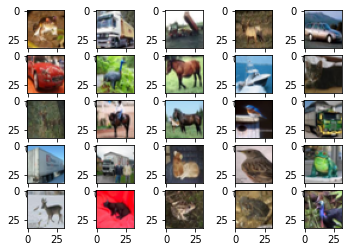

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(TrainX[i])
plt.show()


Normalize Pixel Values

In [ ]:
from numpy import asarray
TrainX=TrainX.astype('float32')/255
TestX=TestX.astype('float32')/255


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


**Step 1 : Define the model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5) , activation='relu' , kernel_initializer='he_uniform' , input_shape= TrainX.shape[1:] ))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3) , activation='relu' , kernel_initializer='he_uniform' ))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

**Step 2 : Compile the model**

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

**Step 3 : Fit the model**

In [ ]:
history=model.fit(x=TrainX,y=TrainY,epochs=10,batch_size=100)

Epoch 1/10
500/500 [==============================] - 39s 75ms/step - loss: 2.0046 - accuracy: 0.2653
Epoch 2/10
500/500 [==============================] - 34s 68ms/step - loss: 1.7127 - accuracy: 0.3814
Epoch 3/10
500/500 [==============================] - 35s 69ms/step - loss: 1.5720 - accuracy: 0.4343
Epoch 4/10
500/500 [==============================] - 34s 68ms/step - loss: 1.4848 - accuracy: 0.4663
Epoch 5/10
500/500 [==============================] - 34s 67ms/step - loss: 1.4291 - accuracy: 0.4881
Epoch 6/10
500/500 [==============================] - 34s 68ms/step - loss: 1.3823 - accuracy: 0.5057
Epoch 7/10
500/500 [==============================] - 34s 68ms/step - loss: 1.3404 - accuracy: 0.5230
Epoch 8/10
500/500 [==============================] - 34s 68ms/step - loss: 1.3052 - accuracy: 0.5353
Epoch 9/10
500/500 [==============================] - 34s 68ms/step - loss: 1.2712 - accuracy: 0.5481
Epoch 10/10
500/500 [==============================] - 35s 70ms/step - loss: 1.242

چون اکیوریسی خیلی پایین است ولیدیشن را اضافه می کنیم

In [ ]:
history=model.fit(x=TrainX,y=TrainY,epochs=10,batch_size=100, validation_data=(TestX,TestY))

Epoch 1/10
500/500 [==============================] - 36s 72ms/step - loss: 1.2156 - accuracy: 0.5701 - val_loss: 1.1856 - val_accuracy: 0.5821
Epoch 2/10
500/500 [==============================] - 36s 72ms/step - loss: 1.1918 - accuracy: 0.5803 - val_loss: 1.1444 - val_accuracy: 0.6041
Epoch 3/10
500/500 [==============================] - 36s 72ms/step - loss: 1.1673 - accuracy: 0.5912 - val_loss: 1.1467 - val_accuracy: 0.6064
Epoch 4/10
500/500 [==============================] - 36s 72ms/step - loss: 1.1489 - accuracy: 0.5960 - val_loss: 1.1068 - val_accuracy: 0.6177
Epoch 5/10
500/500 [==============================] - 36s 72ms/step - loss: 1.1291 - accuracy: 0.6020 - val_loss: 1.1040 - val_accuracy: 0.6116
Epoch 6/10
500/500 [==============================] - 37s 75ms/step - loss: 1.1127 - accuracy: 0.6102 - val_loss: 1.0693 - val_accuracy: 0.6316
Epoch 7/10
500/500 [==============================] - 37s 74ms/step - loss: 1.1026 - accuracy: 0.6126 - val_loss: 1.0740 - val_accuracy:

**Step 4 :Evaluate the model**

In [ ]:
Loss,Accuracy=model.evaluate(TestX,TestY,verbose=2)
print('Accuracy: ',Accuracy*100)
print('Loss: ',Loss*100)


313/313 - 2s - loss: 1.0282 - accuracy: 0.6424 - 2s/epoch - 7ms/step
Accuracy:  64.24000263214111
Loss:  102.81950235366821


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0

Model Aechitecture Plot

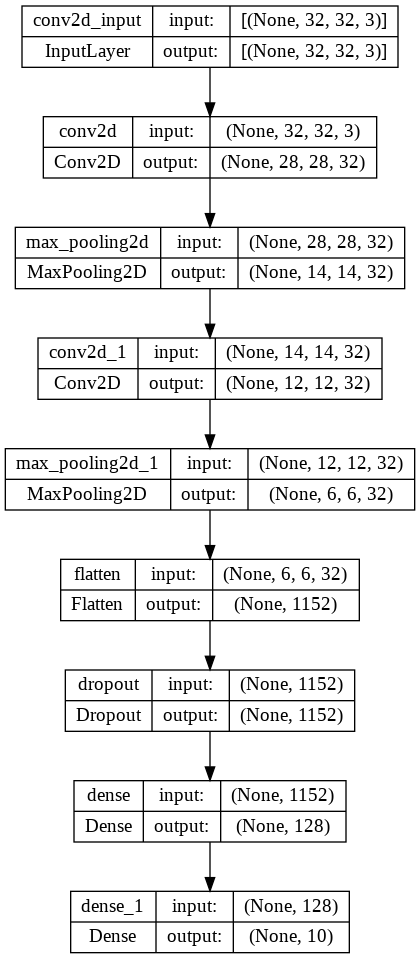

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

Plot Learning Curves

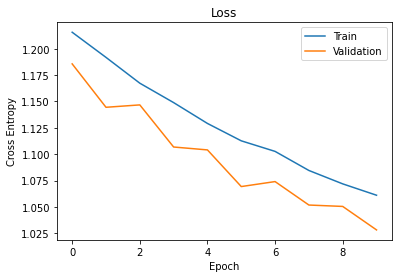

In [ ]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()


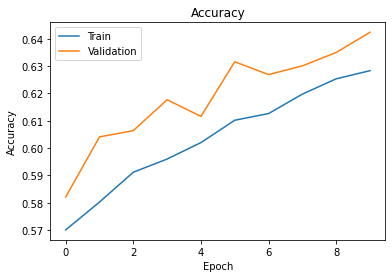

In [ ]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()